In [8]:
!git clone https://github.com/cvrg-iyte/DATA602repo.git
url =  "./DATA602repo/income2.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
import pandas as pd
data = pd.read_csv(url, header=None, names=names)

fatal: destination path 'DATA602repo' already exists and is not an empty directory.


## **This is how our data looks**

In [9]:
print(data)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Handle missing values
data.replace(' ?', pd.NA, inplace=True)  # Replace '?' with NA for handling missing values
data.fillna(data.mode().iloc[0], inplace=True)  # Replace missing values with mode

# Convert categorical features into numerical format using label encoding
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

## **These are the numerical features of data**

In [11]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


/var/folders/fv/lgmtkydj29vdm9tjjkgrny980000gn/T/ipykernel_89314/3517511300.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  original_option = pd.get_option('mode.use_inf_as_na')
/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/fv/lgmtkydj29vdm9tjjkgrny980000gn/T/ipykernel_89314/3517511300.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  original_option = pd.get_option('mode.use_inf_as_na')
/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

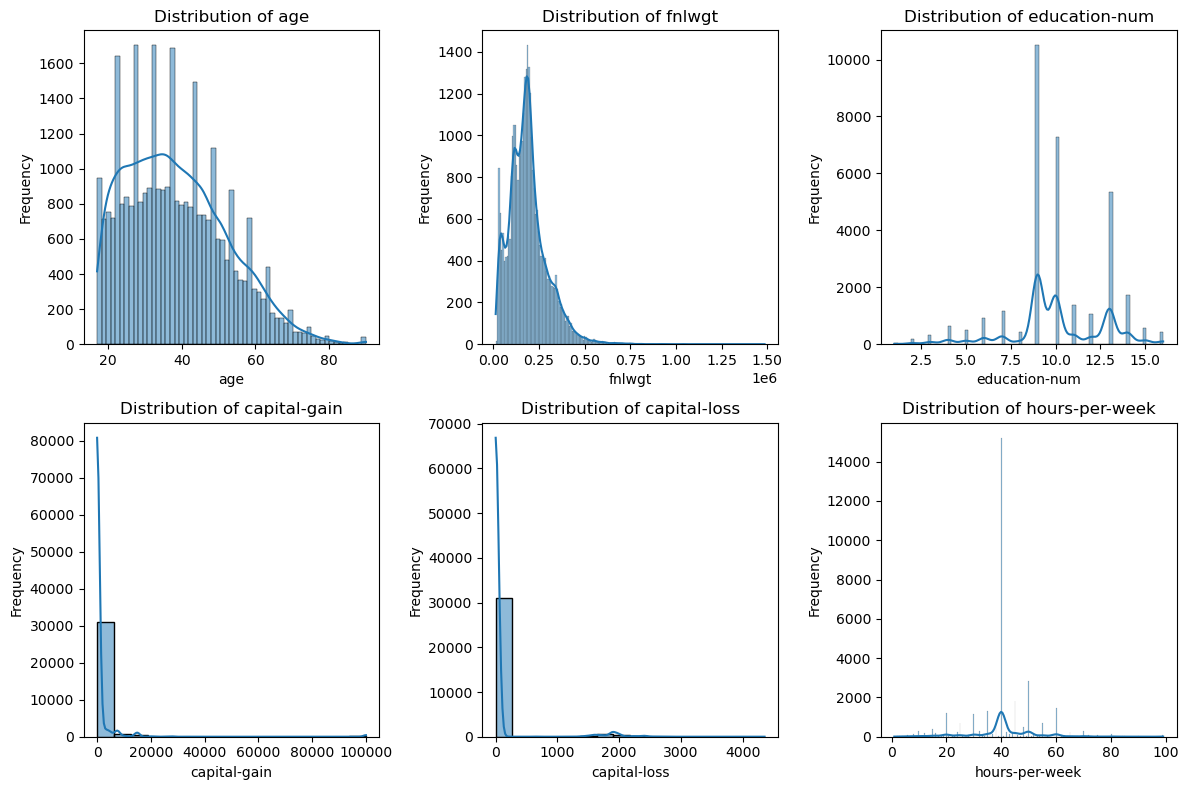

In [13]:
# Distribution of Numerical Features
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    original_option = pd.get_option('mode.use_inf_as_na')
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# **These histograms show the distribution of each numerical variable**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score

X = data.drop('income', axis=1)
y = data['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature selection methods
feature_selection_methods = {
    'No Selection': None,
    'Random Forest Feature Importance': SelectFromModel(RandomForestClassifier()),
    'PCA': PCA(n_components=1) 
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Define hyperparameters for grid search
param_grids = {
    'Logistic Regression': {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__penalty': ['l1', 'l2']},
    'Random Forest': {'clf__n_estimators': [50, 100, 150], 'clf__max_depth': [None, 10, 20], 'clf__min_samples_split': [2, 5, 10], 'clf__min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'clf__n_estimators': [50, 100, 150], 'clf__learning_rate': [0.01, 0.1, 0.5], 'clf__max_depth': [3, 5, 7]},
    'SVM': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'clf__n_neighbors': [3, 5, 7]}
}
# Define the evaluation metric as a list
evaluation_metrics = ['accuracy', 'f1']

results = {}

for fs_name, fs_method in feature_selection_methods.items():
    print("Feature Selection Method:", fs_name)
    results[fs_name] = {}
    X_train_selected = X_train if fs_method is None else fs_method.fit_transform(X_train, y_train)
    X_test_selected = X_test if fs_method is None else fs_method.transform(X_test)
    for clf_name, clf in classifiers.items():
        print("Classifier:", clf_name)
        # Define pipeline with feature scaling if needed
        if isinstance(clf, SVC):
            pipeline = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
        else:
            pipeline = Pipeline([('clf', clf)])
        # Grid search with cross-validation
        grid_search = GridSearchCV(pipeline, param_grids[clf_name], cv=5, scoring=evaluation_metrics, refit='accuracy')
        grid_search.fit(X_train_selected, y_train)
        # Best hyperparameters
        best_params = grid_search.best_params_
        print("Best hyperparameters:", best_params)
        # Best model
        best_model = grid_search.best_estimator_
        # Cross-validation scores
        cv_scores_accuracy = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring='accuracy')
        cv_scores_f1 = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring='f1')
        print("Cross-validation accuracy scores:", cv_scores_accuracy)
        print("Mean CV accuracy:", np.mean(cv_scores_accuracy))
        print("Cross-validation F1 scores:", cv_scores_f1)
        print("Mean CV F1 score:", np.mean(cv_scores_f1))
        # Evaluate on test set
        test_accuracy = accuracy_score(y_test, best_model.predict(X_test_selected))
        test_f1_score = f1_score(y_test, best_model.predict(X_test_selected))
        print("Test set accuracy:", test_accuracy)
        print("Test set F1 score:", test_f1_score)
        print()
        # Store results
        results[fs_name][clf_name] = {'best_params': best_params, 'cv_accuracy_scores': cv_scores_accuracy, 'cv_f1_scores': cv_scores_f1, 'test_accuracy': test_accuracy, 'test_f1_score': test_f1_score}

# Print results
for fs_name, fs_results in results.items():
    print("Feature Selection Method:", fs_name)
    for clf_name, clf_result in fs_results.items():
        print("Classifier:", clf_name)
        print("Best hyperparameters:", clf_result['best_params'])
        print("Mean CV accuracy:", np.mean(clf_result['cv_accuracy_scores']))
        print("Mean CV F1 score:", np.mean(clf_result['cv_f1_scores']))
        print("Test set accuracy:", clf_result['test_accuracy'])
        print("Test set F1 score:", clf_result['test_f1_score'])
        print()


Feature Selection Method: No Selection
Classifier: Logistic Regression


/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packa

Best hyperparameters: {'clf__C': 10, 'clf__penalty': 'l2'}
Cross-validation accuracy scores: [0.78944338 0.80172745 0.78809981 0.80437704 0.79401037]
Mean CV accuracy: 0.7955316079618584
Cross-validation F1 scores: [0.38057595 0.38767042 0.39005525 0.48142494 0.41842818]
Mean CV F1 score: 0.4116309471892349
Test set accuracy: 0.7951788730231844
Test set F1 score: 0.42500000000000004

Classifier: Random Forest
Best hyperparameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Cross-validation accuracy scores: [0.85604607 0.86737044 0.86295585 0.8648493  0.86792091]
Mean CV accuracy: 0.8638285132516474
Cross-validation F1 scores: [0.65892857 0.68968531 0.67149977 0.69102113 0.69438302]
Mean CV F1 score: 0.681103560537402
Test set accuracy: 0.866421004145555
Test set F1 score: 0.6947368421052632

Classifier: Gradient Boosting
Best hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 150}
Cross-v

/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packa

Best hyperparameters: {'clf__C': 0.001, 'clf__penalty': 'l2'}
Cross-validation accuracy scores: [0.79193858 0.79788868 0.79232246 0.79381839 0.79784988]
Mean CV accuracy: 0.7947635957108047
Cross-validation F1 scores: [0.30955414 0.32282958 0.30729834 0.30976864 0.33142857]
Mean CV F1 score: 0.3161758533098024
Test set accuracy: 0.796714263780132
Test set F1 score: 0.3299595141700405

Classifier: Random Forest
Best hyperparameters: {'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}
Cross-validation accuracy scores: [0.84721689 0.85201536 0.84952015 0.84795546 0.85352275]
Mean CV accuracy: 0.850046122004253
Cross-validation F1 scores: [0.61299709 0.63969897 0.62488038 0.62570888 0.64817383]
Mean CV F1 score: 0.6302918310999197
Test set accuracy: 0.8538307999385844
Test set F1 score: 0.641025641025641

Classifier: Gradient Boosting
Best hyperparameters: {'clf__learning_rate': 0.5, 'clf__max_depth': 3, 'clf__n_estimators': 50}
Cross-v

/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/deepikakarlapudi/Desktop/anaconda3/lib/python3.11/site-packa

Best hyperparameters: {'clf__C': 0.001, 'clf__penalty': 'l2'}
Cross-validation accuracy scores: [0.75930902 0.48023033 0.75930902 0.48857746 0.75926281]
Mean CV accuracy: 0.6493377289933376
Cross-validation F1 scores: [0.         0.35091083 0.         0.36206897 0.        ]
Mean CV F1 score: 0.14259595992991042
Test set accuracy: 0.7587901120835252
Test set F1 score: 0.0

Classifier: Random Forest
Best hyperparameters: {'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 150}
Cross-validation accuracy scores: [0.75911708 0.75930902 0.75873321 0.75811096 0.75926281]
Mean CV accuracy: 0.7589066170355531
Cross-validation F1 scores: [0.00158983 0.00159109 0.00159109 0.00316456 0.00633914]
Mean CV F1 score: 0.0028551412179902832
Test set accuracy: 0.7587901120835252
Test set F1 score: 0.0025396825396825392

Classifier: Gradient Boosting
Best hyperparameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}
Cross-vali

### OBSERVATIONS

* We used five different classifiers like logistic regression, Random Forest,
  SVM, Gradient Boosting and K-Nearest Neighbours with their respective hyper parameter combinations

* We considered Feature Selection Methods like PCA and Random Forest Feature
  Selection

* We chose mean accuracy and F1 score as our evaluation metrics

* We applied Grid Search Cross Validation method for Hyperparamter tuning

* We trained our data through each combination of Feature Selection Method
  and Classifier to find evaluation metrics and the best hyper parameter values of that combination

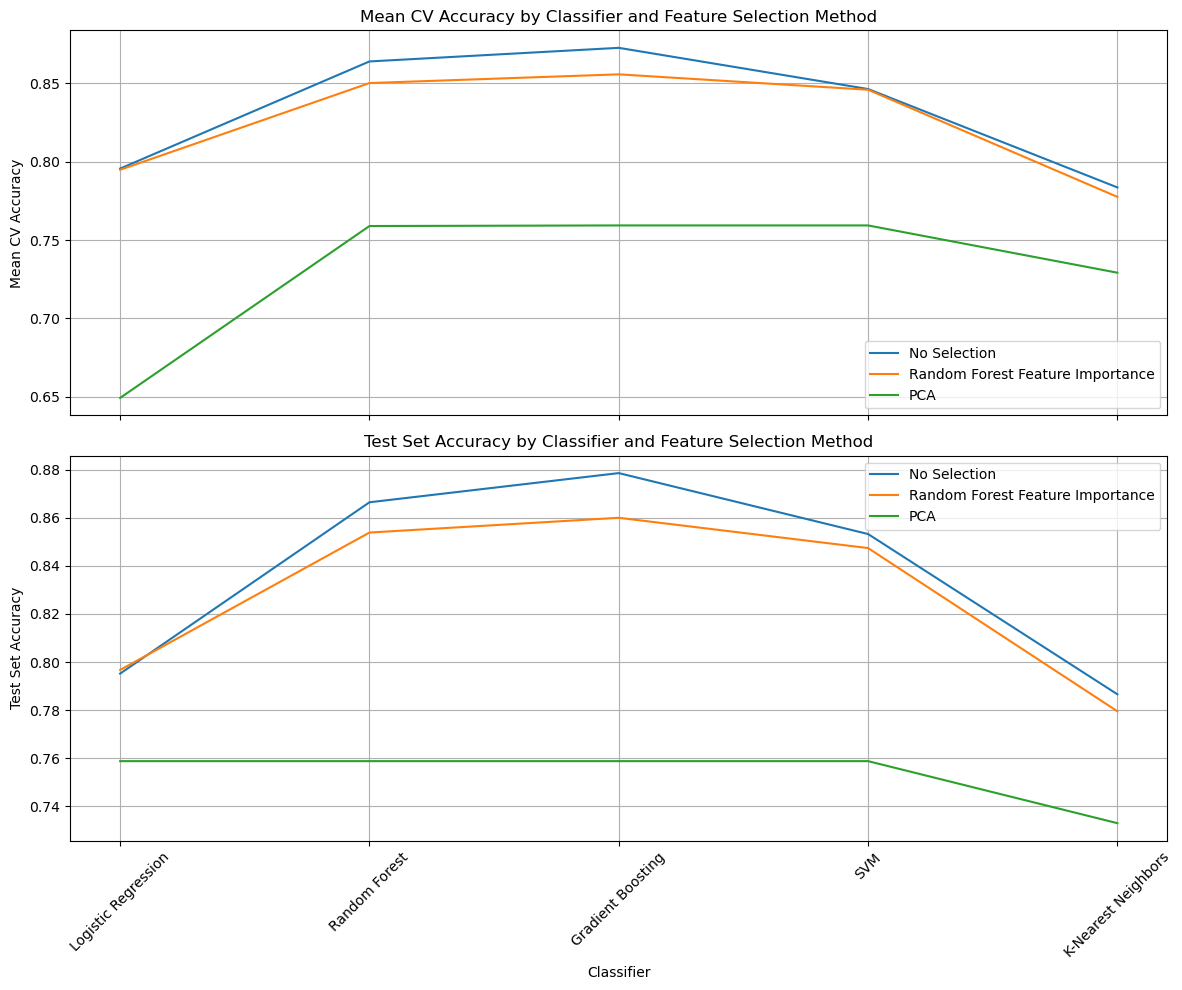

In [15]:
import matplotlib.pyplot as plt

# Initialize lists to store results
mean_cv_accuracies = []
test_accuracies = []

# Initialize lists to store classifiers and feature selection methods
classifiers_list = []
feature_selection_methods_list = []

# Iterate over feature selection methods
for fs_name, fs_results in results.items():
    mean_cv_accuracy_fs = []
    test_accuracy_fs = []
    # Iterate over classifiers
    for clf_name, clf_result in fs_results.items():
        mean_cv_accuracy_fs.append(np.mean(clf_result['cv_accuracy_scores']))
        test_accuracy_fs.append(clf_result['test_accuracy'])
        if fs_name not in feature_selection_methods_list:
            feature_selection_methods_list.append(fs_name)
        if clf_name not in classifiers_list:
            classifiers_list.append(clf_name)
    mean_cv_accuracies.append(mean_cv_accuracy_fs)
    test_accuracies.append(test_accuracy_fs)

# Plot results
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

for i, fs_name in enumerate(feature_selection_methods_list):
    axs[0].plot(classifiers_list, mean_cv_accuracies[i], label=fs_name)
    axs[1].plot(classifiers_list, test_accuracies[i], label=fs_name)

axs[0].set_title('Mean CV Accuracy by Classifier and Feature Selection Method')
axs[0].set_ylabel('Mean CV Accuracy')
axs[0].legend()
axs[0].grid(True)

axs[1].set_title('Test Set Accuracy by Classifier and Feature Selection Method')
axs[1].set_xlabel('Classifier')
axs[1].set_ylabel('Test Set Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **In the above graphs we can see that training data accuracy is high for all the classifers with no feature selection on training data. Similarly, even for testing data accuracy is high for data with no feature selection for all the classifiers.**

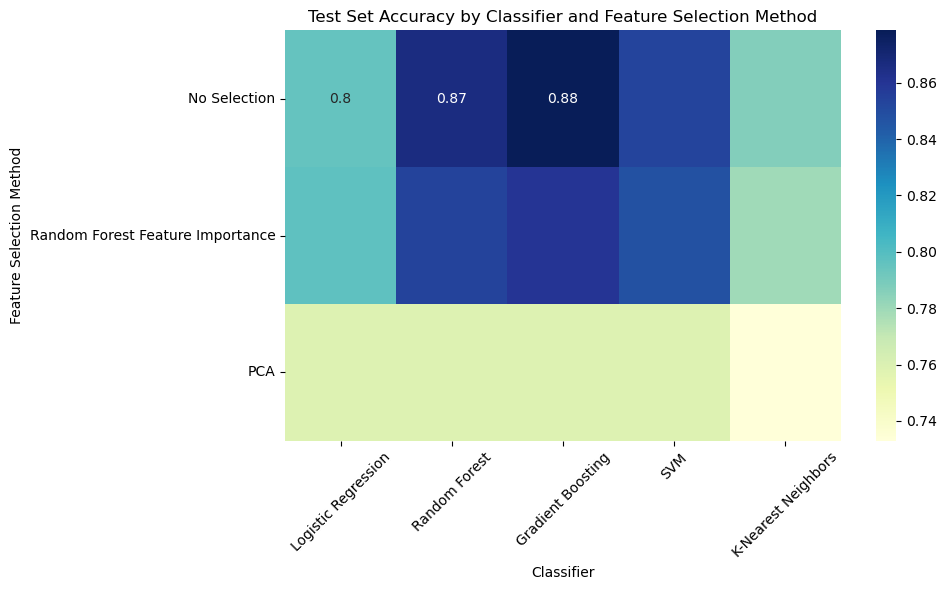

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract test set accuracies for each combination
test_accuracies_matrix = np.zeros((len(feature_selection_methods), len(classifiers)))
for i, fs_name in enumerate(feature_selection_methods):
    for j, clf_name in enumerate(classifiers):
        test_accuracies_matrix[i, j] = results[fs_name][clf_name]['test_accuracy']

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(test_accuracies_matrix, annot=True, cmap="YlGnBu", xticklabels=classifiers, yticklabels=feature_selection_methods)
plt.title("Test Set Accuracy by Classifier and Feature Selection Method")
plt.xlabel("Classifier")
plt.ylabel("Feature Selection Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The heat map shows the testing data set accuracy for each classifer and each feature selection method combination